# Project Title: Predicting Hotel Booking Cancellations.

## Written and Presented by: Bate Bita Tambe


## <u>INTRODUCTION TO PROJECT:</u>
<br> The Project, Hotel Booking is based on a data article containing two datasets of hotel demand data. The first dataset (H1) represents hotel data pertaining to a resort hotel and the other is for a city hotel (H2), both located in Portugal. 
<br> Both datasets share the same structure, with <b> 31 features </b> describing <b> 40,060 observations of H1 and 79,330 observations of H2.</b> 
<br> Each observation represents a hotel booking. Both datasets were recorded between the 1st of July, 2015 and the 31st of August, 2017. These datasets include bookings that effectively arrived and bookings that were canceled.

## Getting the Data:

The data was purposefully collected by <b>Nuno Antonio, Ana de Almeida and Luis Nunes</b>, and published by <b>Elsevier Inc.</b> They obtained the data directly from the hotels’ PMS databases’ servers by executing a TSQL query on SQL Server Studio Manager, which is the integrated environment tool for managing Microsoft SQL databases. 
<br> The data is available at <b>ScienceDirect</b> in zipped folders which we downloaded onto our local workspace and unzipped using the 'Extract All' command.
<br> The zipped folders contain data in three different types of file formats, namely;
   <br>> R Data Files
   <br>> CSV Files
   <br>> R Script


# Purpose of Data:
This open access article was created with the aim to serve the following descriptive analysis:
<br> ¬ Perform research in different problems such as booking cancellation prediction, customer segmentation, customer satiation, seasonality, etc.
<br> ¬ Benchmark bookings’ prediction cancellation models against results already known.
<br> ¬ Evaluate the performance of different algorithms for solving similar types of problems (e.g classification, segmentation problems).
<br> ¬ Obtain statistics for data mining training.


Since this is real hotel data, all data elements pertaining to the hotel or customer identification have been deleted. Due to the scarcity of real business data for scientific and educational purposes, these datasets have an important role for research and education in revenue management, machine learning, and data mining. In our case, we will be using the data sets to train multiple Machine Leaning Models. <b> Stay Tuned :)) <b>

## Loading Data in Pandas Dataframes:


In [2]:
import pandas as pd

h1_df = pd.read_csv("H1.csv")
h2_df = pd.read_csv("H2.csv")

## Checking Data:

## a) H1:

In [3]:
h1_df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


## b) H2:

In [4]:
h2_df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


## Merging Datasets:

In [5]:
import pandas as pd
dataset = pd.concat([h1_df, h2_df], axis=0, ignore_index=True)
pd.set_option('display.max_columns', None)
dataset.describe(include='all')

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
count,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,119390,119390,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,334,353,NaN,4,NaN,NaN,NaN,3,926
top,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,9,NULL,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,31961,112593,NaN,89613,NaN,NaN,NaN,75166,1461
mean,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,NaN,NaN,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,NaN,NaN,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


<!DOCTYPE html>
<html>
<head>
    <style>
        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            border: 1px solid black;
            padding: 8px;
            text-align: left;
        }
        th {
            background-color: #f2f2f2;
        }
    </style>
</head>
<body>

<h2>Summary of Features:</h2>

<table>
    <tr>
        <th>Name of Feature</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>ADR</td>
        <td>Average Daily Rate as defined by the American Hotel and Lodging Association. It is calculated as the Total Revenue from Rooms Sold divided by Number of Rooms Sold.</td>
    </tr>
    <tr>
        <td>Adults</td>
        <td>Number of adults.</td>
    </tr>
    <tr>
        <td>Agent</td>
        <td>ID of the travel agency that made the booking.</td>
    </tr>
    <tr>
        <td>ArrivalDateDayOfMonth</td>
        <td>Day of the month of the arrival date.</td>
    </tr>
    <tr>
        <td>ArrivalDateMonth</td>
        <td>Month of arrival date with 12 categories: “January” to “December”.</td>
    </tr>
    <tr>
        <td>ArrivalDateWeekNumber</td>
        <td>Week number of the arrival date.</td>
    </tr>
    <tr>
        <td>ArrivalDateYear</td>
        <td>Year of arrival date.</td>
    </tr>
    <tr>
        <td>AssignedRoomType</td>
        <td>Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request.</td>
    </tr>
    <tr>
        <td>Babies</td>
        <td>Number of babies.</td>
    </tr>
    <tr>
        <td>BookingChanges</td>
        <td>Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.</td>
    </tr>
    <tr>
        <td>Children</td>
        <td>Number of children.</td>
    </tr>
    <tr>
        <td>Company</td>
        <td>ID of the company/entity that made the booking or responsible for paying the booking.</td>
    </tr>
    <tr>
        <td>Country</td>
        <td>Country of origin.</td>
    </tr>
    <tr>
        <td>CustomerType</td>
        <td>Type of booking, assuming one of four categories: Contract, Group, Transient and Transient-party.</td>
    </tr>
    <tr>
        <td>DaysInWaitingList</td>
        <td>Number of days the booking was in the waiting list before it was confirmed to the customer.</td>
    </tr>
    <tr>
        <td>DepositType</td>
        <td>Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: “No Deposit”, “Non Refund” and “Refundable”.</td>
    </tr>
    <tr>
        <td>DistributionChannel</td>
        <td>Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.</td>
    </tr>
    <tr>
        <td>IsCanceled</td>
        <td>Value indicating if the booking was canceled (1) or not (0).</td>
    </tr>
    <tr>
        <td>IsRepeatedGuest</td>
        <td>Value indicating if the booking name was from a repeated guest (1) or not (0).</td>
    </tr>
    <tr>
        <td>LeadTime</td>
        <td>Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.</td>
    </tr>
    <tr>
        <td>MarketSegment</td>
        <td>Market segment designation.</td>
    </tr>
    <tr>
        <td>Meal</td>
        <td>Type of meal booked. Categories are presented in standard hospitality meal packages: BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner).</td>
    </tr>
    <tr>
        <td>PreviousBookingsNotCanceled</td>
        <td>Number of previous bookings not cancelled by the customer prior to the current booking.</td>
    </tr>
    <tr>
        <td>PreviousCancellations</td>
        <td>Number of previous bookings that were cancelled by the customer prior to the current booking.</td>
    </tr>
    <tr>
        <td>RequiredCardParkingSpaces</td>
        <td>Number of car parking spaces required by the customer.</td>
    </tr>
    <tr>
        <td>ReservationStatus</td>
        <td>Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why.</td>
    </tr>
    <tr>
        <td>ReservationStatusDate</td>
        <td>Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.</td>
    </tr>
    <tr>
        <td>ReservedRoomType</td>
        <td>Code of room type reserved.</td>
    </tr>
    <tr>
        <td>StaysInWeekendNights</td>
        <td>Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.</td>
    </tr>
    <tr>
        <td>StaysInWeekNights</td>
        <td>Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.</td>
    </tr>
    <tr>
        <td>TotalOfSpecialRequests</td>
        <td>Number of special requests made by the customer (e.g. twin bed or high floor).</td>
    </tr>
</table>

</body>
</html>

# Framing Problem and Understanding the Bigger Picture:
The big question one can ask, based on the available data is, <b> Will Customer X Cancel their Hotel Booking?? </b>
<br> We will train models that will address this question, with the aim of providing an accurate answer, based on the available features of the thousands of observations provided to us over the years. 
<br> This is a <b> Binary Classification Problem </b> and as such, we will focus on Precision, Recall and F1 Score as our Performance Metrics.

## Type of Data in Data Set:

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   IsCanceled                   119390 non-null  int64  
 1   LeadTime                     119390 non-null  int64  
 2   ArrivalDateYear              119390 non-null  int64  
 3   ArrivalDateMonth             119390 non-null  object 
 4   ArrivalDateWeekNumber        119390 non-null  int64  
 5   ArrivalDateDayOfMonth        119390 non-null  int64  
 6   StaysInWeekendNights         119390 non-null  int64  
 7   StaysInWeekNights            119390 non-null  int64  
 8   Adults                       119390 non-null  int64  
 9   Children                     119386 non-null  float64
 10  Babies                       119390 non-null  int64  
 11  Meal                         119390 non-null  object 
 12  Country                      118902 non-null  object 
 13 

<!DOCTYPE html>
<html>
<head>
    <style>
        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            border: 1px solid black;
            padding: 8px;
            text-align: left;
        }
        th {
            background-color: #f2f2f2;
        }
    </style>
</head>
<body>

<h2>Type of Features:</h2>

<table>
    <tr>
        <th>Categorical Features</th>
        <th>Numerical Features</th>
        <th>Datetime Features</th>
    </tr>
    <tr>
        <td>ArrivalDateMonth</td>
        <td>IsCanceled</td>
        <td>ReservationStatusDate</td>
    </tr>
    <tr>
        <td>Meal</td>
        <td>LeadTime</td>
        <td></td>
    </tr>
    <tr>
        <td>Country</td>
        <td>ArrivalDateYear</td>
        <td></td>
    </tr>
    <tr>
        <td>MarketSegment</td>
        <td>ArrivalDateWeekNumber</td>
        <td></td>
    </tr>
    <tr>
        <td>DistributionChannel</td>
        <td>ArrivalDateDayOfMonth</td>
        <td></td>
    </tr>
    <tr>
        <td>ReservedRoomType</td>
        <td>StaysInWeekendNights</td>
        <td></td>
    </tr>
    <tr>
        <td>AssignedRoomType</td>
        <td>StaysInWeekNights</td>
        <td></td>
    </tr>
    <tr>
        <td>DepositType</td>
        <td>Adults</td>
        <td></td>
    </tr>
    <tr>
        <td>Agent</td>
        <td>Children</td>
        <td></td>
    </tr>
    <tr>
        <td>Company</td>
        <td>Babies</td>
        <td></td>
    </tr>
    <tr>
        <td>CustomerType</td>
        <td>IsRepeatedGuest</td>
        <td></td>
    </tr>
    <tr>
        <td>ReservationStatus</td>
        <td>PreviousCancellations</td>
        <td></td>
    </tr>
    <tr>
        <td></td>
        <td>PreviousBookingsNotCanceled</td>
        <td></td>
    </tr>
    <tr>
        <td></td>
        <td>BookingChanges</td>
        <td></td>
    </tr>
    <tr>
        <td></td>
        <td>DaysInWaitingList</td>
        <td></td>
    </tr>
    <tr>
        <td></td>
        <td>ADR</td>
        <td></td>
    </tr>
    <tr>
        <td></td>
        <td>RequiredCarParkingSpaces</td>
        <td></td>
    </tr>
    <tr>
        <td></td>
        <td>TotalOfSpecialRequests</td>
        <td></td>
    </tr>
</table>

</body>
</html>


## Handling Missing Values:

In [7]:
# Checking for missing values in the training set
missing_values = dataset.isnull().sum()

# Filtering columns with missing values
missing_columns = missing_values[missing_values > 0]

print("Columns with missing values in the training set:")
print(missing_columns)

Columns with missing values in the training set:
Children      4
Country     488
dtype: int64


## 1) Handling the Missing Values in the 'Country' Column:

Although the column 'Country' is missing only 488 values, which can be easily fixed by finding the mode of the existing countries, or using the K-Nearest Neighbors (KNN) imputation to predict the missing countries, I am choosing to drop the column entirely. While this feature provides information about the customer's origin, including it in the model could introduce ethical concerns and potential biases, which is something I am committed to avoiding. To ensure that the model remains fair and unbiased, I believe it is best to exclude the 'Country' feature entirely.


In [8]:
dataset = dataset.drop(columns=['Country'])
dataset.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 2) Handling the Missing Values in the 'Children' Column:

There are four missing values in this column. We will impute the mode of that column into these missing rows.

In [9]:
mode = dataset['Children'].mode()[0]
dataset['Children'].fillna(mode, inplace = True)
dataset.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 3) Dropping Redundant Columns (Reservation Status and Status Date):
We will be dropping the 'ReservationStatus' and 'ReservationStatusDate' Columns for the following reasons: 



The Reservation Status has a perfect correlation to our target feature, 'IsCanceled'. It has two values: 'Checked Out' and 'Canceled'. Including this feature in the model training will result in a 100% prediction accuracy, which is infact not the case. 


The Reservation Status Date on the other hand, is the date for which the Reservation Status was recorded. It does not play any role in helping the model predict future cancellations.

In [10]:
dataset = dataset.drop(columns=["ReservationStatusDate", "ReservationStatus"])
dataset.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
0,0,342,2015,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0
1,0,737,2015,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0
2,0,7,2015,July,27,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0
3,0,13,2015,July,27,1,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.0,0,0
4,0,14,2015,July,27,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1


## Splitting Data into Train and Test Sets:

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Defining features and target variable
X = dataset.drop(columns='IsCanceled')
y = dataset['IsCanceled']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

training_data = (X_train, y_train)
testing_data = (X_test, y_test)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")


Training set shape: (95512, 27), (95512,)
Testing set shape: (23878, 27), (23878,)


## Visualizing Training and Test Sets: 

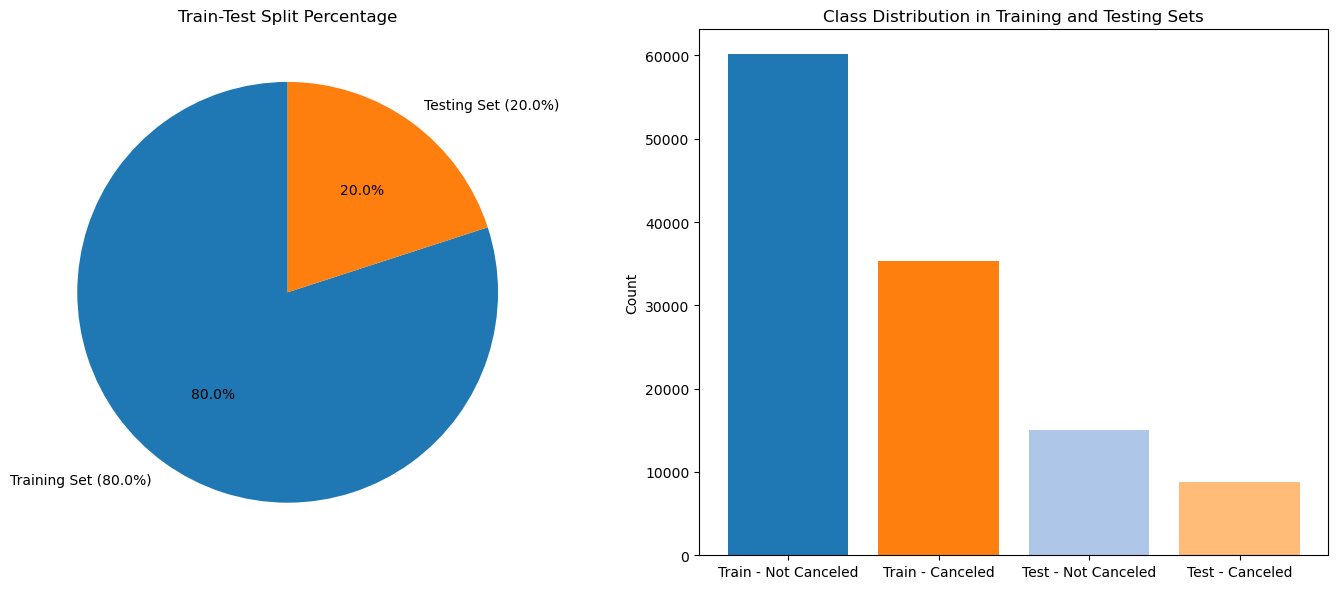

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating class distribution
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

# Calculating the percentages of the splits
total_samples = len(y)
train_percentage = len(y_train) / total_samples * 100
test_percentage = len(y_test) / total_samples * 100

# Plotting class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart for training data
axes[0].pie([len(y_train), len(y_test)], labels=[f'Training Set ({train_percentage:.1f}%)', f'Testing Set ({test_percentage:.1f}%)'], autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'])
axes[0].set_title('Train-Test Split Percentage')

# Bar plot for class distribution in training and test sets
axes[1].bar(['Train - Not Canceled', 'Train - Canceled'], train_counts, color=['#1f77b4', '#ff7f0e'])
axes[1].bar(['Test - Not Canceled', 'Test - Canceled'], test_counts, color=['#aec7e8', '#ffbb78'])
axes[1].set_title('Class Distribution in Training and Testing Sets')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


The pie chart above shows us what percentage of our data has been drawn out as our training set, and what has been drawn out for our test set. 
<br> The bar graph goes further to show us the imbalances in our target feature, both in the training and test sets.

## Graphical Visualizations and Explanations:

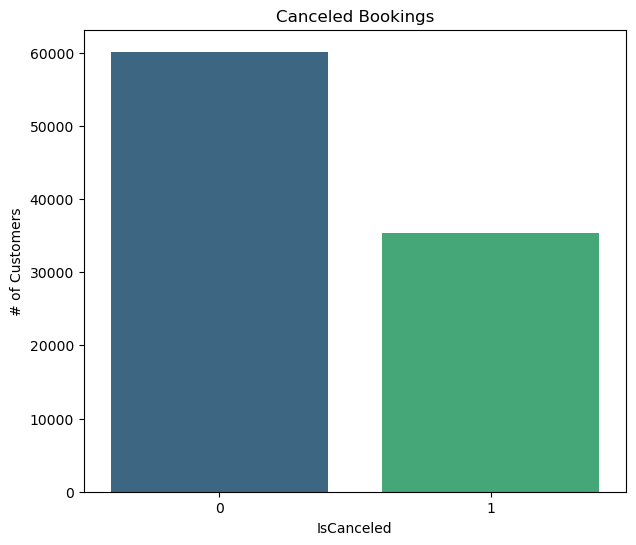

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

X_train, y_train = training_data

# Combining X_train and y_train for visualization
train_data = X_train.copy()
train_data['IsCanceled'] = y_train

# Imbalance of the IsCanceled Feature
plt.figure(figsize=(7, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title('Canceled Bookings')
plt.xlabel('IsCanceled')
plt.ylabel('# of Customers')
plt.show()

This visualization provides a simple overview of how many customers canceled their bookings and how many didn't. <b>0</b> means that the customer <b>'Did Not Cancel'</b> their booking and <b>1</b> means the customer <b>'Did Infact Cancel'</b> their hotel booking. Understanding this distribution is crucial for assessing the overall cancellation rate and its potential impact on hotel operations and revenue management strategies. This plot tells us that our data is imbalanced, with less number of people actually cancelling their hotel booking.

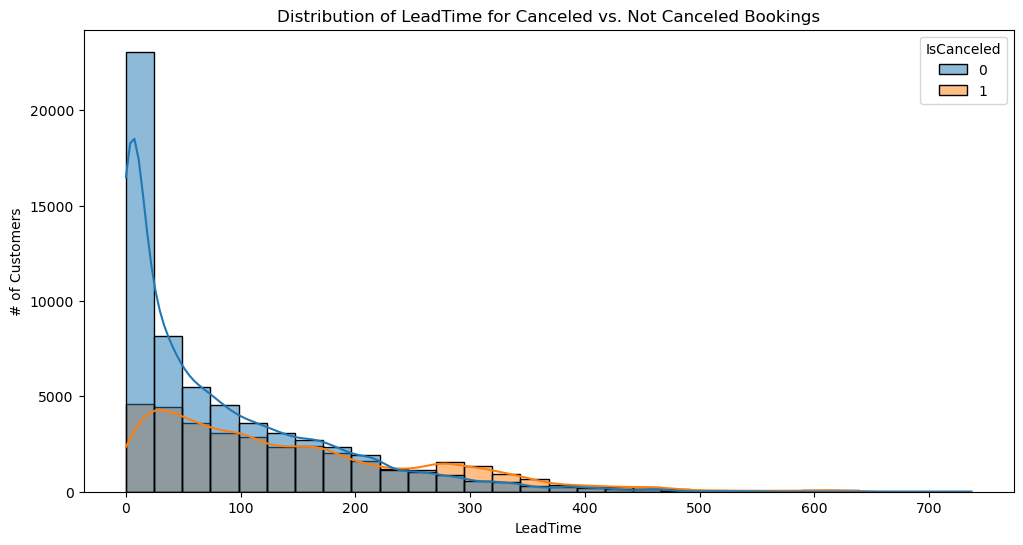

In [14]:
# Distribution of LeadTime for Canceled vs. Not Canceled Bookings
plt.figure(figsize=(12, 6))
sns.histplot(data=train_data, x='LeadTime', hue='IsCanceled', kde=True, bins=30)
plt.title('Distribution of LeadTime for Canceled vs. Not Canceled Bookings')
plt.xlabel('LeadTime')
plt.ylabel('# of Customers')
plt.show()


The plot above illustrates how far ahead guests typically make their reservations (Lead Time). This is an interesting histogram, that shows the lead time for canceled bookings as well as not canceled bookings. It helps us understand when most bookings were made, and if they eventually get canceled or not, down the line.

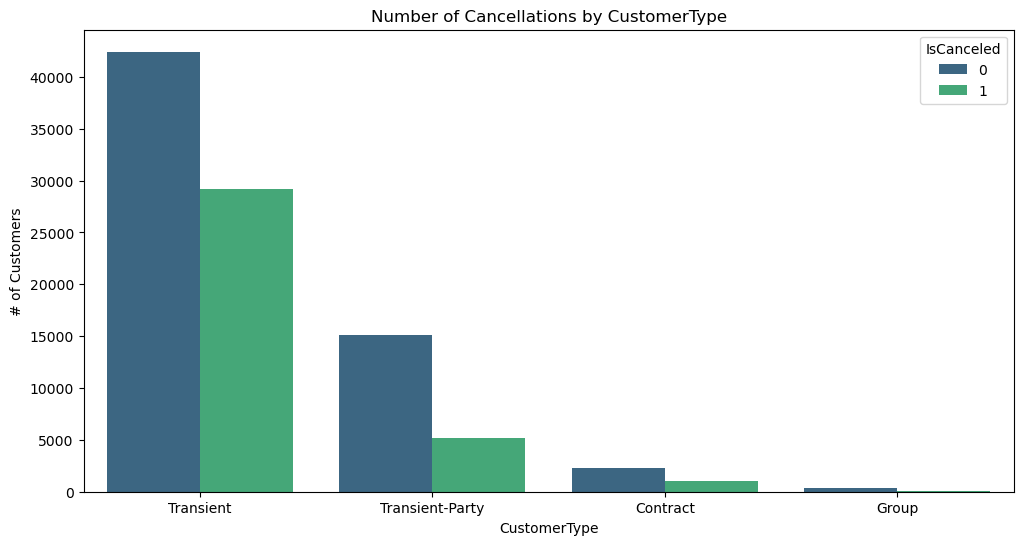

In [15]:
# Number of Cancellations by CustomerType
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='CustomerType', hue='IsCanceled', palette='viridis')
plt.title('Number of Cancellations by CustomerType')
plt.xlabel('CustomerType')
plt.ylabel('# of Customers')
plt.show()


This count plot shows the comparison between different customer types and their cancellation behaviours. The following is more information about the different customer types we have in our dataset:
<br>1) Transient – when the booking is not part of a group or contract, and is not associated to other transient bookings.
<br>2) Transient-party – when the booking is transient, but is associated to at least one other transient booking.
<br>3) Contract - when the booking has an allotment or other type of contract associated to it.
<br>4) Group – when the booking is associated to a group.

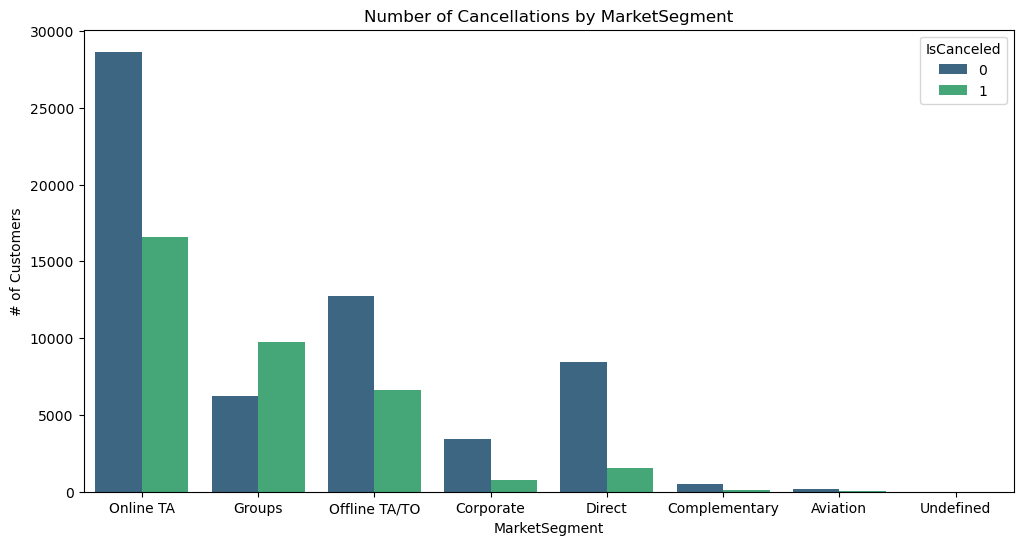

In [16]:
# Number of Cancellations by MarketSegment
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='MarketSegment', hue='IsCanceled', palette='viridis')
plt.title('Number of Cancellations by MarketSegment')
plt.xlabel('MarketSegment')
plt.ylabel('# of Customers')
plt.show()

This graph shows the cancellation behaviours of the different Market Segments. It reveals which market segments are more prone to cancellations.
<br> “TA” means “Travel Agents” 
<br> “TO” means “Tour Operators”


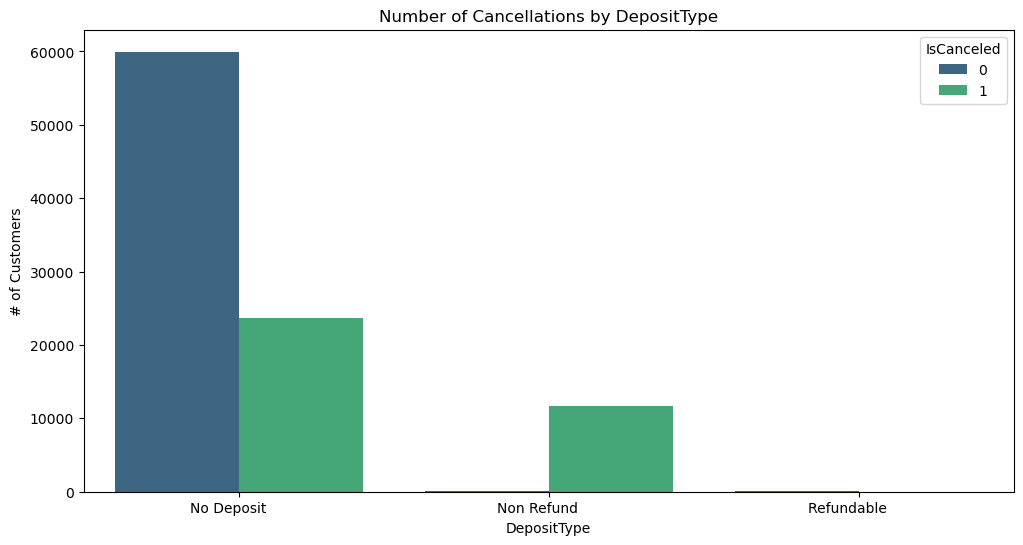

In [17]:
# Number of Cancellations by DepositType
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='DepositType', hue='IsCanceled', palette = 'viridis')
plt.title('Number of Cancellations by DepositType')
plt.xlabel('DepositType')
plt.ylabel('# of Customers')
plt.show()


This plot shows the relationship between deposit types (No Deposit, Non Refund, Refundable) and their cancellation behaviours. Ironically, clients who paid a Non-Refundable Deposit, have demonstrated a higher cancellation rate. 

## Determining Correlations.

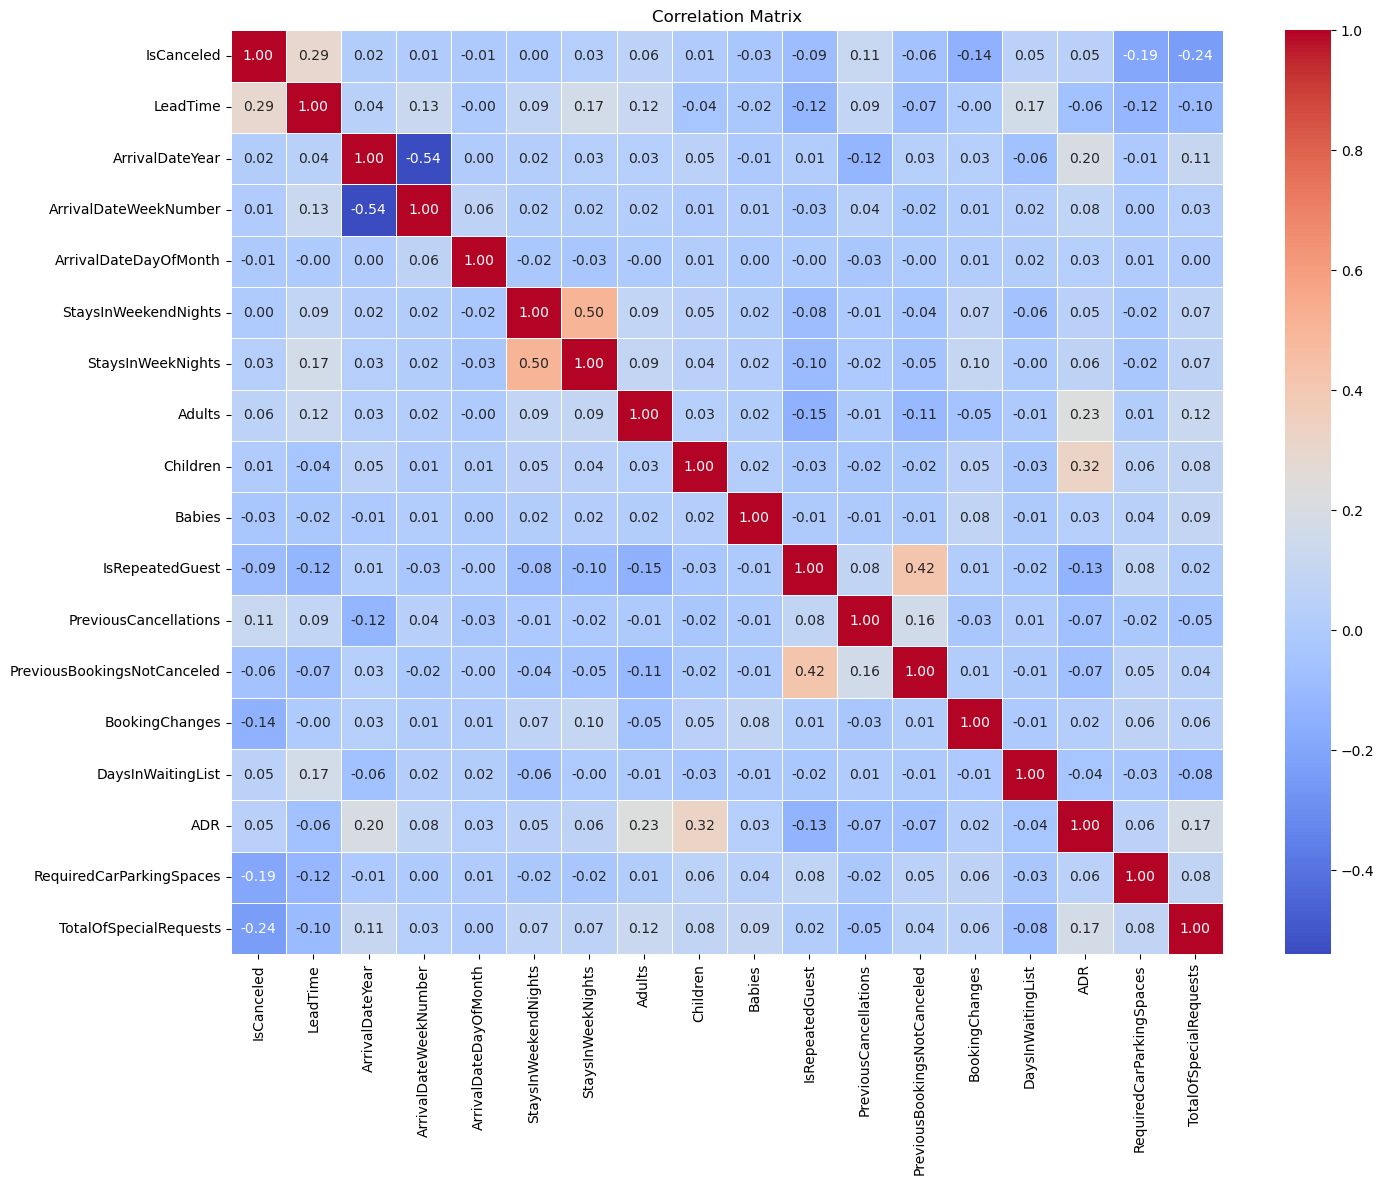

In [18]:
# Concatenating train_data and target feature
conc_train_data = pd.concat([y_train, X_train], axis=1)

# Selecting numerical features
numeric_train_data = conc_train_data.select_dtypes(include=['number'])

# Computing the correlation matrix
corr_matrix = numeric_train_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix heatmap visualizes the relationships between numerical features in the dataset, with color intensity indicating the strength of correlations. Red represents strong positive correlations, while blue signifies strong negative correlations. This plot helps identify which features have significant relationships with each other and the target variable 'IsCanceled'. Strongly correlated features to 'IsCanceled' are potential predictors for the model.
<br> Our top five, most correlated features, based on our Correlation Matrix are: LeadTime, PreviousCancellations, BookingChanges, RequiredCarParkingSpaces, TotalOfSpecialRequests. 

## Pairplot with Highly Correlated Features:

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


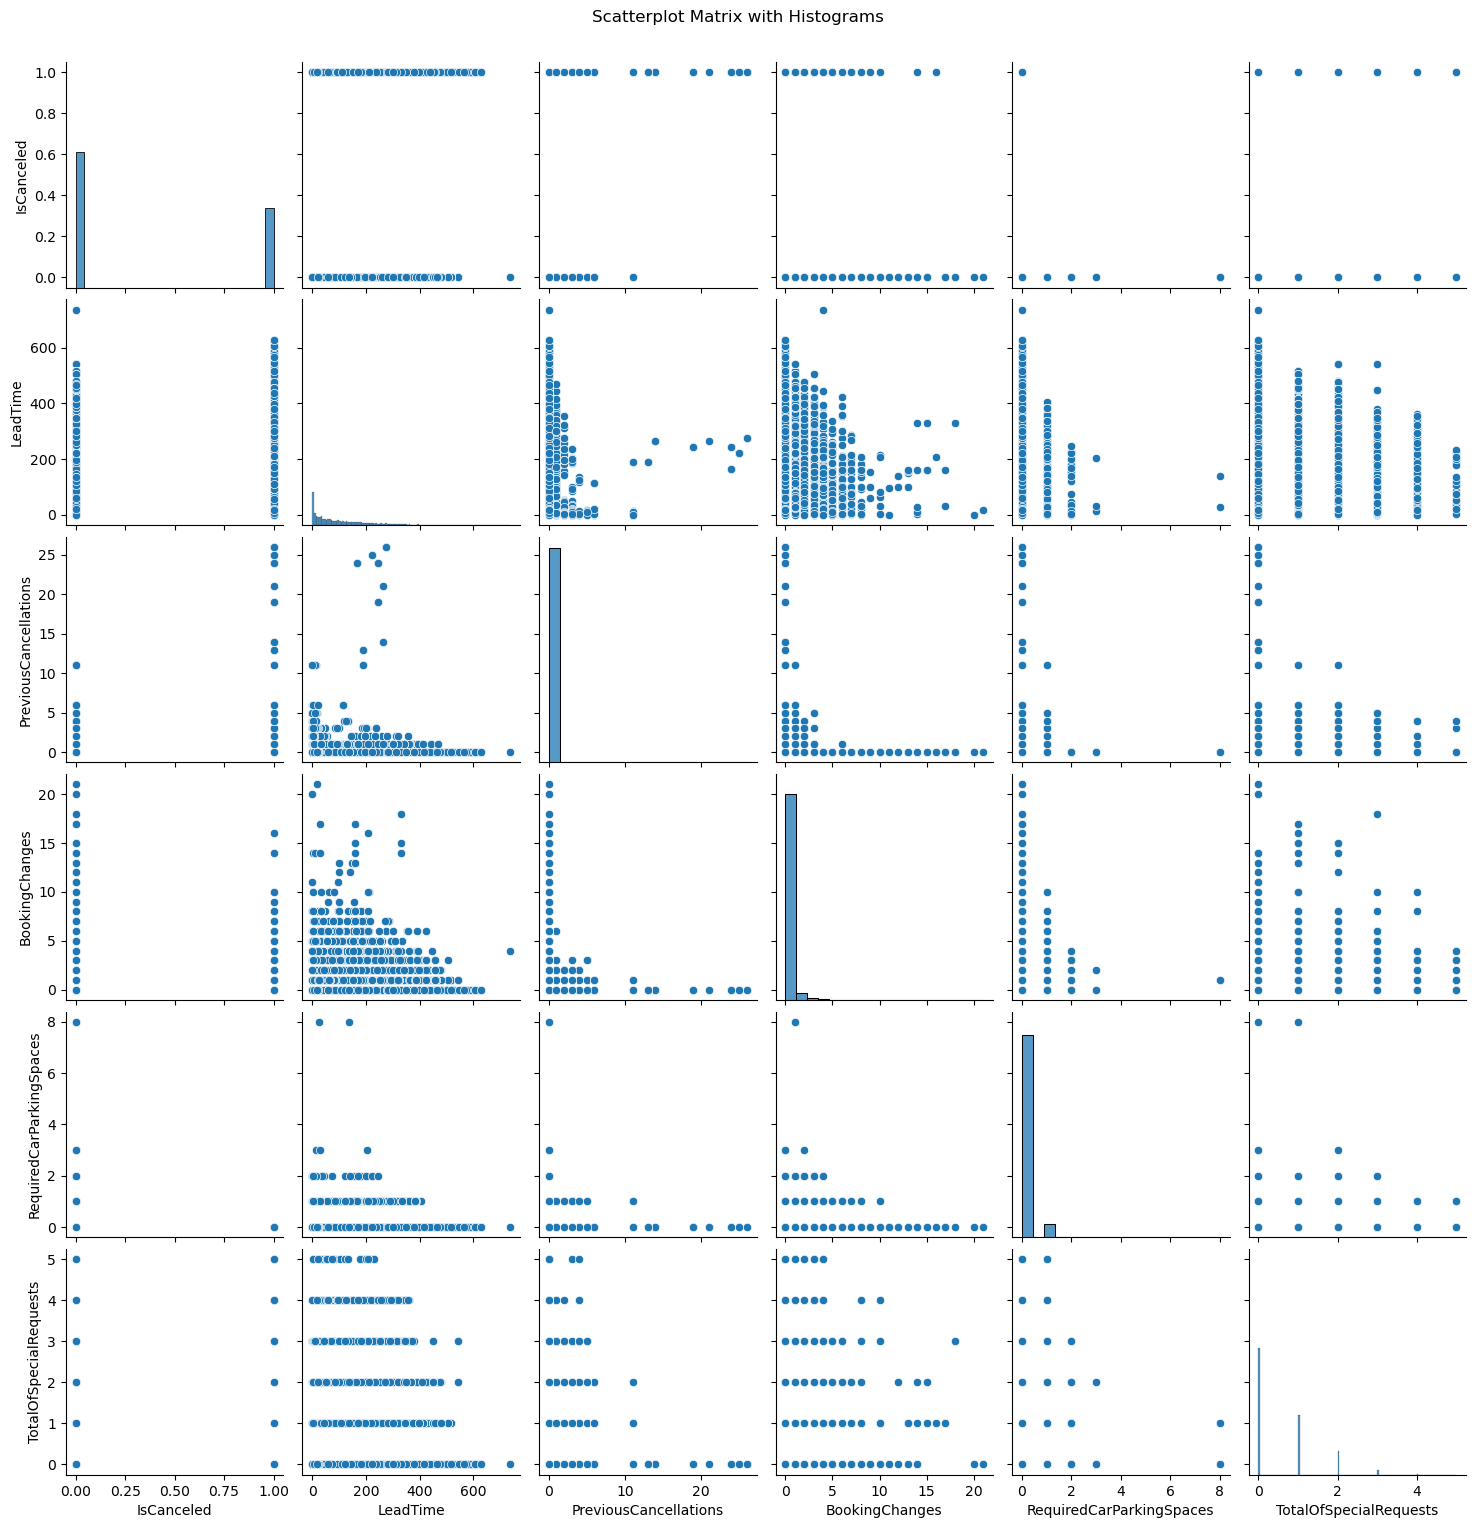

In [19]:
correlated_features = ['IsCanceled', 'LeadTime', 'PreviousCancellations', 'BookingChanges', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests']

# Creating the pairplot with scatter plots and histograms on the diagonal
sns.pairplot(conc_train_data[correlated_features], diag_kind='hist')
plt.suptitle('Scatterplot Matrix with Histograms', y=1.02)
plt.show()

This pairplot shows scatter plots of feature relationships, histograms of feature distributions, and helps identify correlations and trends. It aids in understanding feature interactions and spotting data anomalies, which can guide feature engineering efforts.

# Training Different Machine Learning Models:

# Model 1: Logistic Regression

In [20]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_val_predict, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
import matplotlib.pyplot as plt

train_data = X_train.copy()  
target = y_train

# Defining numerical and categorical columns
numerical_features = [
    'LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
    'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies',
    'IsRepeatedGuest', 'PreviousCancellations', 'PreviousBookingsNotCanceled',
    'BookingChanges', 'DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces',
    'TotalOfSpecialRequests'
]

categorical_features = [
    'ArrivalDateMonth', 'Meal', 'MarketSegment', 'DistributionChannel', 
    'ReservedRoomType', 'AssignedRoomType', 'DepositType', 'Agent', 
    'Company', 'CustomerType'
]

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown = 'ignore', max_categories=20)

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Defining the model
model = LogisticRegression(max_iter=1000)

# Creating the pipeline
pip_LogisticRegression = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Defining parameter grid for GridSearchCV
param_grid = {
    'classifier__C': [0.1, 1.0, 10.0, 100.0],
    'classifier__solver': ['lbfgs', 'liblinear']
}

# Performing grid search with cross-validation
grid_search = GridSearchCV(pip_LogisticRegression, param_grid, cv=5, scoring='f1')
grid_search.fit(train_data, target)

# Getting the best estimator
best_model = grid_search.best_estimator_

# Predicting using cross_val_predict
predictions = cross_val_predict(best_model, train_data, target, cv=5, method='predict_proba')[:, 1]

# Threshold optimization
threshold = 0.5  # You can adjust this based on precision-recall tradeoff
predicted_classes = (predictions >= threshold).astype(int)

# Calculating precision, recall, and f1 scores
precision = precision_score(target, predicted_classes)
recall = recall_score(target, predicted_classes)
f1 = f1_score(target, predicted_classes)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.8269182480180794
Recall: 0.6515729670143305
F1 Score: 0.7288478563298343


# Model 2: K-Nearest Neighbours

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Defining the model
knn_model = KNeighborsClassifier(n_jobs=-1)

# Creating the pipeline
pip_KNN = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', knn_model)
])

# Defining parameter grid for GridSearchCV
knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],
}

# Performing grid search with cross-validation
knn_grid_search = GridSearchCV(pip_KNN, knn_param_grid, cv=5, scoring='f1')
knn_grid_search.fit(train_data, target)

# Getting the best estimator
best_knn_model = knn_grid_search.best_estimator_

# Predicting using cross_val_predict
knn_predictions = cross_val_predict(best_knn_model, train_data, target, cv=5, method='predict_proba')[:, 1]

# Threshold optimization
knn_threshold = 0.5 
knn_predicted_classes = (knn_predictions >= knn_threshold).astype(int)

# Calculating precision, recall, and f1 scores
knn_precision = precision_score(target, knn_predicted_classes)
knn_recall = recall_score(target, knn_predicted_classes)
knn_f1 = f1_score(target, knn_predicted_classes)

print(f'KNN Precision: {knn_precision}')
print(f'KNN Recall: {knn_recall}')
print(f'KNN F1 Score: {knn_f1}')

KNN Precision: 0.7632324868398218
KNN Recall: 0.7458661918087001
KNN F1 Score: 0.7544494160364816


# Model 3: Random Forests

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder

# Preprocessing for categorical data using Ordinal Encoding
categorical_transformer_ordinal =OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, max_categories=20)

# Combining preprocessing steps, without scaling numerical features
preprocessor_ordinal = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer_ordinal, categorical_features)
    ],
    remainder='passthrough'  # This leaves numerical features untouched
)


# Defining the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Creating the pipeline
pip_RandomForest = Pipeline(steps=[
    ('preprocessor', preprocessor_ordinal),
    ('classifier', rf_model)
])

# Defining parameter grid for GridSearchCV
rf_param_grid = {
    'classifier__n_estimators': [200],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Performing grid search with cross-validation
rf_grid_search = GridSearchCV(pip_RandomForest, rf_param_grid, cv=5, scoring='f1')
rf_grid_search.fit(train_data, target)

# Getting the best estimator
best_rf_model = rf_grid_search.best_estimator_

# Predicting using cross_val_predict
rf_predictions = cross_val_predict(best_rf_model, train_data, target, cv=5, method='predict_proba')[:, 1]

# Threshold optimization
rf_threshold = 0.5  
rf_predicted_classes = (rf_predictions >= rf_threshold).astype(int)

# Calculating precision, recall, and f1 scores
rf_precision = precision_score(target, rf_predicted_classes)
rf_recall = recall_score(target, rf_predicted_classes)
rf_f1 = f1_score(target, rf_predicted_classes)

print(f'Random Forest Precision: {rf_precision}')
print(f'Random Forest Recall: {rf_recall}')
print(f'Random Forest F1 Score: {rf_f1}')

Random Forest Precision: 0.8775496946862414
Random Forest Recall: 0.7636733655558382
Random Forest F1 Score: 0.816660873244971


# Model 4: Decision Trees

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Defining the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Creating the pipeline
pip_DecisionTree = Pipeline(steps=[
    ('preprocessor', preprocessor_ordinal),
    ('classifier', dt_model)
])

# Defining parameter grid for GridSearchCV
dt_param_grid = {
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Performing grid search with cross-validation
dt_grid_search = GridSearchCV(pip_DecisionTree, dt_param_grid, cv=5, scoring='f1')
dt_grid_search.fit(train_data, target)

# Getting the best estimator
best_dt_model = dt_grid_search.best_estimator_

# Predicting using cross_val_predict
dt_predictions = cross_val_predict(best_dt_model, train_data, target, cv=5, method='predict_proba')[:, 1]

# Threshold optimization
dt_threshold = 0.5 
dt_predicted_classes = (dt_predictions >= dt_threshold).astype(int)

# Calculating precision, recall, and f1 scores
dt_precision = precision_score(target, dt_predicted_classes)
dt_recall = recall_score(target, dt_predicted_classes)
dt_f1 = f1_score(target, dt_predicted_classes)

print(f'Decision Tree Precision: {dt_precision}')
print(f'Decision Tree Recall: {dt_recall}')
print(f'Decision Tree F1 Score: {dt_f1}')

Decision Tree Precision: 0.7696656344990199
Decision Tree Recall: 0.7657932671924023
Decision Tree F1 Score: 0.7677245678662511


## Evaluating Machine Learning Models on Test Set:


# a) Random Forests:

In [25]:
# Fitting the Random Forest model
pip_RandomForest.fit(X_train, y_train)

# Predicting with Random Forest model
rf_predictions = pip_RandomForest.predict(X_test)

# Calculating scores for Random Forest model
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

print(f'Random Forest - Precision: {rf_precision}')
print(f'Random Forest - Recall: {rf_recall}')
print(f'Random Forest - F1 Score: {rf_f1}')

Random Forest - Precision: 0.8733546325878594
Random Forest - Recall: 0.77263990955342
Random Forest - F1 Score: 0.8199160167966407


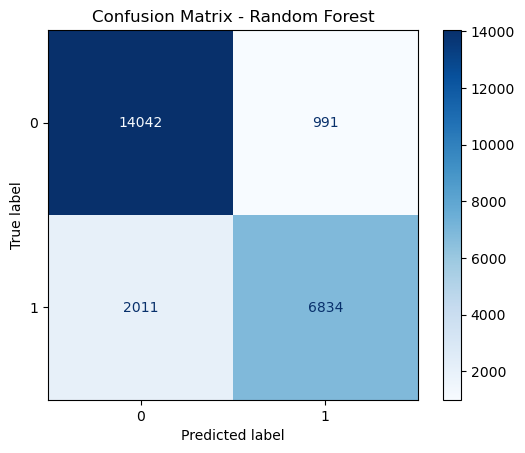

In [29]:
# Plotting the confusion matrix for Random Forest
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_conf_matrix)
rf_disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.show()

# b) Decision Trees:

In [30]:
# Fitting the Decision Tree model
pip_DecisionTree.fit(X_train, y_train)

# Predicting with Decision Tree model
dt_predictions = pip_DecisionTree.predict(X_test)

# Calculating scores for Decision Tree model
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

print(f'Decision Tree - Precision: {dt_precision}')
print(f'Decision Tree - Recall: {dt_recall}')
print(f'Decision Tree - F1 Score: {dt_f1}')

Decision Tree - Precision: 0.765051557822375
Decision Tree - Recall: 0.7801017524024872
Decision Tree - F1 Score: 0.7725033587102552


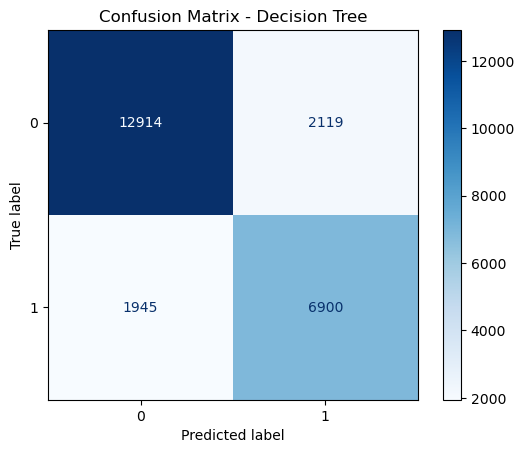

In [31]:
# Plotting the confusion matrix for Decision Tree
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_conf_matrix)
dt_disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# c) Logistic Regression:

In [32]:
# Fitting the Logistic Regression
pip_LogisticRegression.fit(X_train, y_train)

# Predicting with Logistic Regression
lr_predictions = pip_LogisticRegression.predict(X_test)

# Calculating scores for Logistic Regression
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)

print(f'Logistic Regression - Precision: {lr_precision}')
print(f'Logistic Regression - Recall: {lr_recall}')
print(f'Logistic Regression - F1 Score: {lr_f1}')

Logistic Regression - Precision: 0.8262252421570044
Logistic Regression - Recall: 0.646127755794234
Logistic Regression - F1 Score: 0.7251617814998097


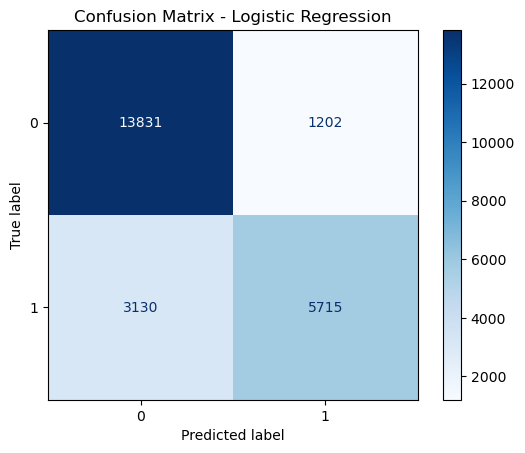

In [33]:
# Plotting the confusion matrix for Logistic Regression
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)
lr_disp = ConfusionMatrixDisplay(confusion_matrix=lr_conf_matrix)
lr_disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# d) K-Nearest Neighbours:

In [34]:
# Fitting the K-Nearest Neighbours
pip_KNN.fit(X_train, y_train)

# Predicting with K-Nearest Neighbours
knn_predictions = pip_KNN.predict(X_test)

# Calculating scores for K-Nearest Neighbours
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)

print(f'KNN - Precision: {knn_precision}')
print(f'KNN - Recall: {knn_recall}')
print(f'KNN - F1 Score: {knn_f1}')

KNN - Precision: 0.7819097888675623
KNN - Recall: 0.7369135104578858
KNN - F1 Score: 0.7587451254292532


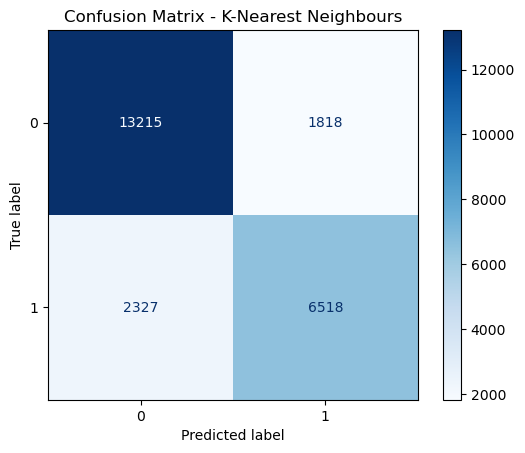

In [35]:
# Plotting the confusion matrix for K-Nearest Neighbours
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)
knn_disp = ConfusionMatrixDisplay(confusion_matrix=knn_conf_matrix)
knn_disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - K-Nearest Neighbours')
plt.show()

## Conclusion.
In this project, we aimed to predict whether a customer will cancel their hotel booking using two datasets containing hotel data. These datasets had 31 features and about 120,000 observations, collected between July 1, 2015, and August 31, 2017. Given the binary classification nature of this problem, we focused on precision, recall, and F1 score as our primary performance metrics.

We trained and evaluated four machine learning models: Logistic Regression, K-Nearest Neighbors (KNN), Random Forests, and Decision Trees. Due to the high costs associated with false negatives in our application, recall was prioritized to ensure we minimize the number of missed cancellations. Among the models, <b>the Decision Trees algorithm achieved the highest recall score, indicating its superior ability to identify all relevant cancellations.</b> Meanwhile, <b>the Random Forests model exhibited the highest F1 score, representing the best balance between precision and recall.</b> This balance is crucial as it ensures that the model performs well not only in identifying cancellations but also in minimizing false positives. Overall, while Decision Trees offer the best assurance against missed cancellations, Random Forests provide a robust performance across both recall and precision metrics, making it a well-rounded choice for predicting hotel booking cancellations.